In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N, D_in, H, D_out = 2, 100, 50, 1

In [4]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


In [5]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [6]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(1000):
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])

    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    

0 4550.41721770663
1 4433.030465619252
2 4318.776071893007
3 4207.5667045426835
4 4099.317634185234
5 3993.9466483664933
6 3891.373969102179
7 3791.5221734941924
8 3694.316117289604
9 3599.682861256744
10 3507.5516002586355
11 3417.853594909873
12 3330.5221057086264
13 3245.492329540556
14 3162.701338456406
15 3082.0880206296215
16 3003.593023404893
17 2927.1586983524458
18 2852.7290482471976
19 2780.2496758953375
20 2709.6677347346167
21 2640.9318811379408
22 2573.9922283531705
23 2508.8003020148176
24 2445.308997166507
25 2383.4725367356396
26 2323.2464314042213
27 2264.587440822577
28 2207.4535361146386
29 2151.803863626017
30 2097.5987098681126
31 2044.7994676133635
32 1993.3686030990038
33 1943.269624298107
34 1894.4670502187628
35 1846.9263811937553
36 1800.6140701246763
37 1755.497494645845
38 1711.5449301751041
39 1668.725523819523
40 1627.009269105742
41 1586.366981505572
42 1546.7702747289545
43 1508.1915377572668
44 1470.6039125912098
45 1433.9812726884334
46 1398.2982020670

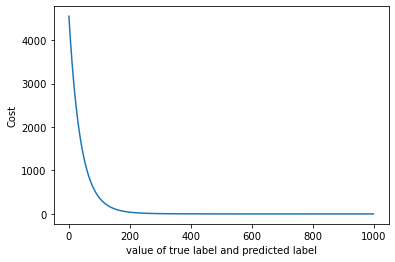

In [7]:
step_list = [i for i in range(len(y_pred_list))]
plt.plot(step_list, loss_list)
plt.xlabel('value of true label and predicted label')
plt.ylabel('Cost')
plt.show()